# Importing Basic Libraries

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [104]:
df = pd.read_csv("/Users/sanket/Downloads/challenge1.csv")
df

,loc1,loc2,para1,dow,para2,para3,para4,price
0,0,01,1,Mon,662,3000.0,3.8,73.49
1,9,99,1,Thu,340,2760.0,9.2,300.00
2,0,04,0,Mon,16,2700.0,3.0,130.00
3,4,40,1,Mon,17,12320.0,6.4,365.00
4,5,50,1,Thu,610,2117.0,10.8,357.50
...,...,...,...,...,...,...,...,...
9995,9,98,3,Fri,386,5000.0,12.0,460.00
9996,7,74,1,Thu,386,3250.0,8.0,325.00
9997,0,06,0,Tue,190,8856.0,5.6,133.33
9998,7,74,3,Fri,717,5000.0,13.6,820.00


## Good news! No NULL values in the dataset

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   loc1    10000 non-null  object 
 1   loc2    10000 non-null  object 
 2   para1   10000 non-null  int64  
 3   dow     10000 non-null  object 
 4   para2   10000 non-null  int64  
 5   para3   10000 non-null  float64
 6   para4   10000 non-null  float64
 7   price   10000 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB


# Exploratory Data Analysis

## Numeric Variables

All of the numeric variables clearly do not show any strong trend with our target variable "Price". I'll leave it to the machine to match data with model.

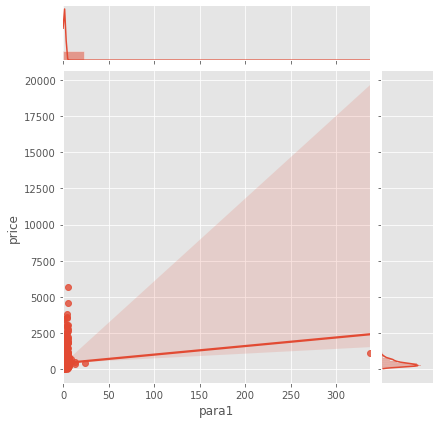

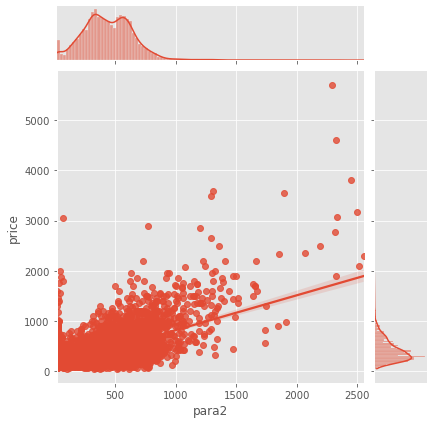

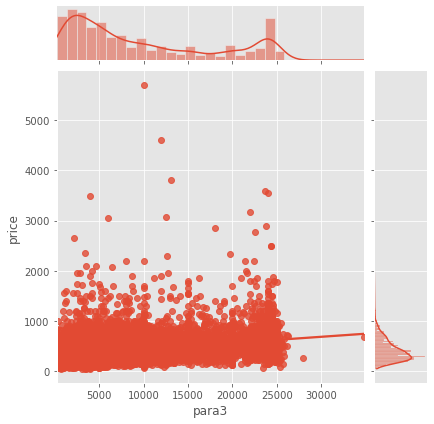

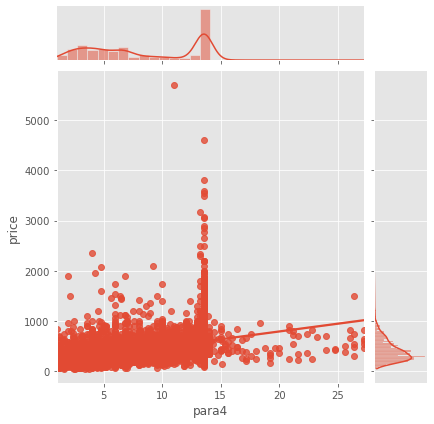

In [106]:
num_columns = ['para1', 'para2', 'para3', 'para4']
for each in num_columns:
    sns.jointplot(data=df, x=each, y='price', kind='reg')

# Categorical Variables

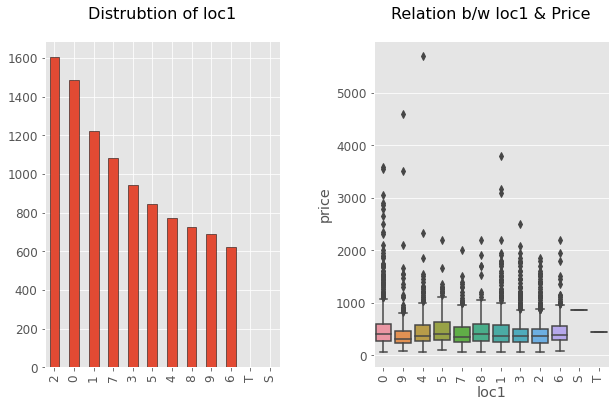

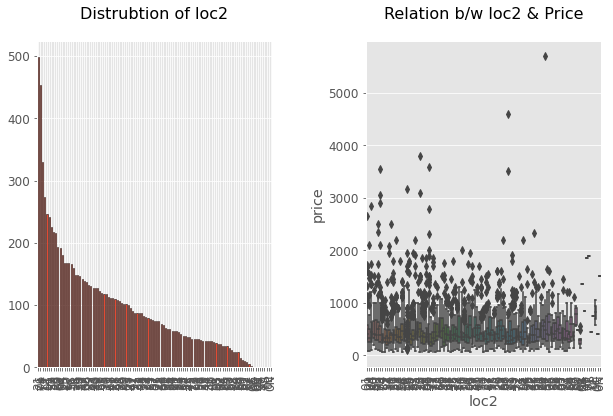

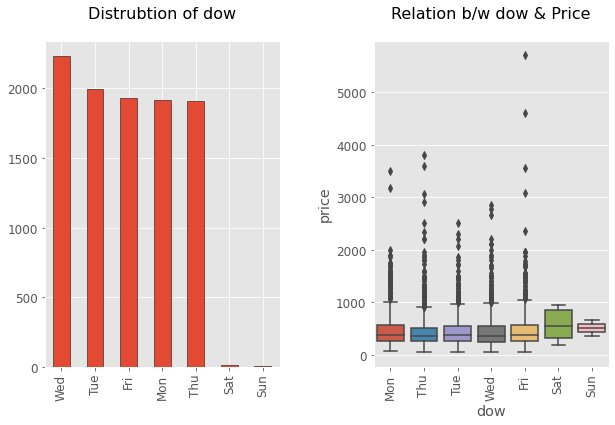

In [107]:
cat_cols = ['loc1', 'loc2', 'dow']
for each in cat_cols:
    df[each].astype('category')
    
def plot_cat(var, rotate=False):
    plt_1 = plt.figure(figsize=(16, 6))
    plt.rcParams['font.size'] = 12
    target = 'price'
    
    plt.subplot(131)
    ax = df[var].value_counts().plot.bar(edgecolor='k')
    plt.title(f'Distrubtion of {var}', size=16, y=1.05)
    plt.xticks(rotation=90)
    
    plt.subplot(132)
    sns.boxplot(data=df, x=var, y=target)
    plt.title(f'Relation b/w {var} & Price', size=16, y=1.05);
    plt.xticks(rotation=90)

    plt.subplots_adjust(wspace=.4)
for each in cat_cols:
    plot_cat(each)

# Outliers!

There appears to be outliers in our data. But I'll make sure I do not lose important information while clipping out the outliers. Therefore, I'll clip out only 1% from the extremes.

In [108]:
for each in num_columns:
    q_low = df[each].quantile(0.01)
    q_hi  = df[each].quantile(0.99)
    df_filtered = df[(df[each] < q_hi) & (df[each] > q_low)]

df_filtered.shape

(9734, 8)

# Data Transformation

### Let's convert object columns to categorical features. Also, since the machine understands only numbers, we need to convert the labels into.. numbers.

In [109]:
cat_cols = ['loc1', 'loc2', 'dow']
for each in cat_cols:
    df_filtered[each] = df_filtered[each].astype('category')
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9734 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   loc1    9734 non-null   category
 1   loc2    9734 non-null   category
 2   para1   9734 non-null   int64   
 3   dow     9734 non-null   category
 4   para2   9734 non-null   int64   
 5   para3   9734 non-null   float64 
 6   para4   9734 non-null   float64 
 7   price   9734 non-null   float64 
dtypes: category(3), float64(3), int64(2)
memory usage: 490.4 KB


In [110]:
from sklearn.preprocessing import LabelEncoder
df_filtered["dow"] = LabelEncoder().fit_transform(df_filtered["dow"])
df_filtered["loc1"] = LabelEncoder().fit_transform(df_filtered["loc1"])
df_filtered["loc2"] = LabelEncoder().fit_transform(df_filtered["loc2"])
df_filtered

,loc1,loc2,para1,dow,para2,para3,para4,price
0,0,1,1,1,662,3000.0,3.8,73.49
1,9,104,1,4,340,2760.0,9.2,300.00
2,0,4,0,1,16,2700.0,3.0,130.00
3,4,45,1,1,17,12320.0,6.4,365.00
4,5,55,1,4,610,2117.0,10.8,357.50
...,...,...,...,...,...,...,...,...
9995,9,103,3,0,386,5000.0,12.0,460.00
9996,7,79,1,4,386,3250.0,8.0,325.00
9997,0,6,0,5,190,8856.0,5.6,133.33
9998,7,79,3,0,717,5000.0,13.6,820.00


# Handling Correlations

We remove correlation so that one group of features do not over-dominate other features. Looking at the heat map below, I see loc1 and loc2 are highly correlated. para3 and para4 are correlated too. But I won't drop features as of now, since we already have very less features to work with. We might come back in our optimization phase.

<AxesSubplot:>

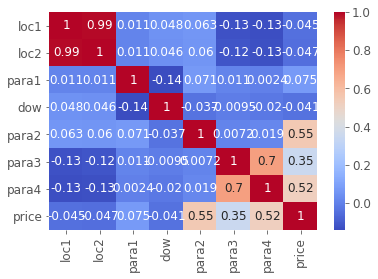

In [111]:
sns.heatmap(df_filtered.corr(), annot = True, cmap= 'coolwarm')

# Scaling

It looks like we have quite a range of values for our numeric variables. Let's bring them down to one common range, so that high-valued variables do not weight in more towards our model.

In [112]:
df.describe()

,para1,para2,para3,para4,price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.380800,447.384000,9547.989920,8.459522,433.733056
std,3.500831,221.005861,8022.814037,4.613526,277.435947
min,0.000000,16.000000,200.000000,1.000000,50.730000
25%,1.000000,301.000000,2898.000000,4.000000,250.000000
50%,1.000000,434.000000,6447.000000,7.200000,370.000000
75%,1.000000,582.000000,15000.000000,13.600000,550.000000
max,337.000000,2554.000000,34782.000000,27.200000,5700.000000


In [113]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_filtered[num_columns] = scaler.fit_transform(df_filtered[num_columns])
df_filtered.head()

,loc1,loc2,para1,dow,para2,para3,para4,price
0,0,1,0.002967,1,0.254531,0.080967,0.201581,73.49
1,9,104,0.002967,4,0.127660,0.074027,0.628458,300.00
2,0,4,0.000000,1,0.000000,0.072292,0.138340,130.00
3,4,45,0.002967,1,0.000394,0.350471,0.407115,365.00
4,5,55,0.002967,4,0.234043,0.055433,0.754941,357.50


# Train Test Split

In [114]:
from sklearn.model_selection import train_test_split

target = df_filtered.pop("price")
X, X_test, y, y_test = train_test_split(df_filtered,target, test_size=0.3, random_state=42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(6813, 7)
(2921, 7)
(6813,)
(2921,)


# Training the model

### Function to train various models and output root mean squared

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

def rmse (y_true,y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

def model_test(model):
    model.fit(X,y)
    predictions = model.predict(X_test)
    model_rmse = rmse(y_test,predictions)
    return model_rmse

# Evaluation

In [116]:
lr = LinearRegression()
lr_rsme = model_test(lr)
print(" the root mean squared error for Linear Regression is:", lr_rsme)
knn = KNeighborsRegressor(n_neighbors=5)
knn_rsme = model_test(knn)
print(" the root mean squared error for K nearest neighbors is:", knn_rsme)
svm = SVR()
svm_rsme = model_test(svm)
print(" the root mean squared error for Support vector machine is:", svm_rsme)
tree = DecisionTreeRegressor()
tree_rsme = model_test(tree)
print(" the root mean squared error for decision tree is:", tree_rsme)
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
rf_rsme = model_test(rf)
gb_rsme = model_test(gb)
print(" the root mean squared error for Random forest is:", rf_rsme)
print(" the root mean squared error for Gradient Boosting is:", gb_rsme)

 the root mean squared error for Linear Regression is: 176.8942953475074
 the root mean squared error for K nearest neighbors is: 248.59840035071426
 the root mean squared error for Support vector machine is: 288.65410209985225
 the root mean squared error for decision tree is: 204.00576575329214
 the root mean squared error for Random forest is: 142.15395526242597
 the root mean squared error for Gradient Boosting is: 144.84704191673276


Using RMSE as our evaluation metric, we see Random Forest has performed the best. My initial guess is because we have less number of features and more training data. So, it's an ideal situation for Random Forest since overfitting is less likely.

<Figure size 864x576 with 0 Axes>

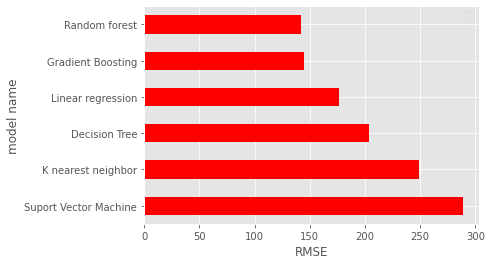

In [117]:
plt1 = plt.figure(figsize=(12,8))

plt.style.use("ggplot")
model_comparison = pd.DataFrame({"model name":["Linear regression", "K nearest neighbor", \
                                               "Suport Vector Machine",
                                              "Decision Tree", "Random forest", "Gradient Boosting"],
                                "rsme": [lr_rsme,knn_rsme,svm_rsme,tree_rsme,rf_rsme,gb_rsme]})
model_comparison = model_comparison.sort_values("rsme", ascending=False).\
plot(x="model name", y="rsme", color="red", kind="barh")
plt.xlabel("RMSE")
plt.legend("")

### Our Random Forest has predicted almost the same values as the test set, except for a little bump at the top, and a squigle on the right slope of our graph. This might probably be due to outliers.

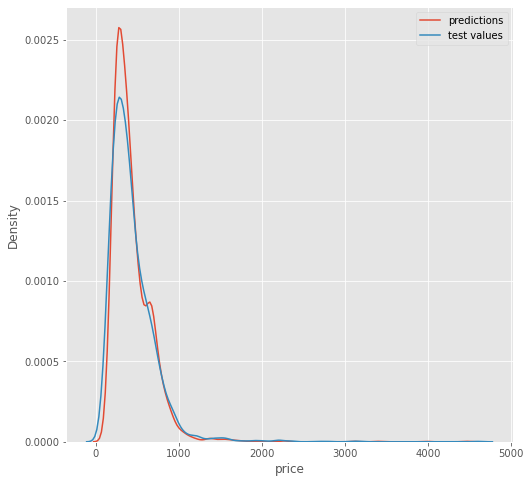

In [118]:
plt.figure(figsize=(8,8))
sns.kdeplot(rf.predict(X_test), label="predictions")
sns.kdeplot(y_test, label="test values")
plt.legend()
plt.show()

# Time to go deep into Neural Nets!

We will train an Artificial Neural Network with 1000 epochs.

In [119]:
from sklearn.metrics import r2_score, mean_squared_error
# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping


# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense( 50, activation='relu',input_dim = X.shape[1]))

# Adding the second hidden layer
model.add(Dense(25,activation='relu'))

# Adding the third hidden layer
model.add(Dense(50,activation='relu'))
# Adding the output layer
model.add(Dense(1))

# Compiling the ANN
model.compile(loss='mean_squared_error', optimizer='Adamax')

#create monitor
monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience=5, verbose=1, mode= "auto")

# Fitting the ANN to the Training set
model_history=model.fit(X,y, callbacks = [monitor], validation_split=0.20, batch_size = 10, epochs = 1000)

Epoch 1/1000
545/545 [==============================] - 1s 2ms/step - loss: 146781.0312 - val_loss: 152177.7969
Epoch 2/1000
545/545 [==============================] - 1s 1ms/step - loss: 121775.9219 - val_loss: 143371.5000
Epoch 3/1000
545/545 [==============================] - 1s 2ms/step - loss: 110243.8516 - val_loss: 127961.5703
Epoch 4/1000
545/545 [==============================] - 1s 1ms/step - loss: 92417.0859 - val_loss: 112461.2031
Epoch 5/1000
545/545 [==============================] - 1s 1ms/step - loss: 79586.4688 - val_loss: 101670.3828
Epoch 6/1000
545/545 [==============================] - 1s 1ms/step - loss: 71714.0547 - val_loss: 93608.1016
Epoch 7/1000
545/545 [==============================] - 1s 1ms/step - loss: 64678.6055 - val_loss: 85618.1797
Epoch 8/1000
545/545 [==============================] - 1s 1ms/step - loss: 58044.1758 - val_loss: 78117.4688
Epoch 9/1000
545/545 [==============================] - 1s 1ms/step - loss: 54347.5039 - val_loss: 75087.4531
Ep

Doesn't look like our ANN performed better than our Random Forest. We will stick with Random Forest.

In [120]:
mse = model.evaluate(X_test, y_test)
print(" the root mean squared error for randoom forest is:", mse**(1/2))

92/92 [==============================] - 0s 807us/step - loss: 28702.6523
 the root mean squared error for randoom forest is: 169.4185714251835


# Model Optimization

We see, these are the default parameters we used to train our Random Forest algorithm. Let's use RandomizedSearchCV to input a set of default parameters and check improvement in our model.

In [121]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [122]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [123]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 40, cv = 5, \
                               verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X, y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

## Here are the best parameters. Let's try to put these in and compare our models.

In [124]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': True}

In [125]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X,y)
base_rmse = rmse(y_test,rf.predict(X_test))
random_rmse = rmse(y_test,rf_random.best_estimator_.predict(X_test))
print("Base model RMSE:", base_rmse) 
print("Optimized model RMSE:", random_rmse)
print("Improvement of", (base_rmse-random_rmse))

Base model RMSE: 142.15395526242597
Optimized model RMSE: 147.55567550632114
Improvement of -5.40172024389517


# Conclusion

Optimized Random Forest has by far performed the best amongst our set of models. There's definitely room for improvement - handling outliers, in-depth feature selection and increasing the space for hyperparameter optimization (time/accuracy tradeoff). With no clear trend in the features, and no pre-built intuitions about the data, an RMSE of 141.83 is what my final model is able to output. On an average, my final model has a +- $0.04 difference against the actual prices. 